In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Admin\Documents'

In [4]:
df = pd.read_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'laws_crime_population.csv'), index_col = False)

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

Unnamed: 0.1  Unnamed: 0    State    County  Violent crime total  \
0             0           0  Arizona   Cochise                   47   
1             1           1  Arizona  Coconino                  127   
2             2           2  Arizona    Mohave                  135   
3             3           3  Arizona     Pinal                  197   
4             4           4  Arizona   Yavapai                  193   

   Murder/NNMS  Rape  Robbery  Aggravated assault  Property crime total  \
0            0     1        3                  43                   531   
1            6    17        1                 103                   264   
2            3     6       19                 107                  1983   
3            3     5       18                 171                  1469   
4            5     0        4                 184                   860   

   Burglary  Larceny/theft  Motor vehicle theft  FELONY  VIOLENT  DEALER  \
0       195            273                   63       1        0       0   
1        59            180                   25       1        0       0   
2       573           1197                  213       1        0       0   
3       321            987                  161       1        0       0   
4       155            608                   97       1        0       0   

   PERMIT  TRAINING  REGISTRATION  UNIVERSAL  ASSAULT  OPENCARRYH  \
0       0         0             0          0        0           0   
1       0         0             0          0        0           0   
2       0         0             0          0        0           0   
3       0         0             0          0        0           0   
4       0         0             0          0        0           0   

   OPENCARRYPERMITH  PERMITCONCEALED  NOSYG  LAWTOTAL         Strictness  \
0                 0                0      0         8  Fewer regulations   
1                 0                0      0         8  Fewer regulations   
2                 0                0      0         8  Fewer regulations   
3                 0                0      0         8  Fewer regulations   
4                 0                0      0         8  Fewer regulations   

            Const_Carry  Population _merge  
0  Constitutional carry      125922   both  
1  Constitutional carry      143476   both  
2  Constitutional carry      212181   both  
3  Constitutional carry      462789   both  
4  Constitutional carry      235099   both

In [11]:
#since I want to look at whether violent crime correlates with population, we need to aggregate a new variable that tells us crime relative to population. 
#A high number of violent crimes may not mean the county itself is actually violent, just that there are a lot of people there
#After this, we can compare number of violent crimes to number of violent crimes per person. If there is a correlation, it will mean that more people in a county does likely mean more or less crimes
#defining our function
def ratio(df):
    proportion = df['Violent crime total']/df['Population']
    return proportion

In [12]:
#applying to our dataframe
df['Violent crime rate'] = df.apply(ratio, axis=1)

In [13]:
#let's see if it worked
df.head()

Unnamed: 0.1  Unnamed: 0    State    County  Violent crime total  \
0             0           0  Arizona   Cochise                   47   
1             1           1  Arizona  Coconino                  127   
2             2           2  Arizona    Mohave                  135   
3             3           3  Arizona     Pinal                  197   
4             4           4  Arizona   Yavapai                  193   

   Murder/NNMS  Rape  Robbery  Aggravated assault  Property crime total  \
0            0     1        3                  43                   531   
1            6    17        1                 103                   264   
2            3     6       19                 107                  1983   
3            3     5       18                 171                  1469   
4            5     0        4                 184                   860   

   Burglary  Larceny/theft  Motor vehicle theft  FELONY  VIOLENT  DEALER  \
0       195            273                   63       1        0       0   
1        59            180                   25       1        0       0   
2       573           1197                  213       1        0       0   
3       321            987                  161       1        0       0   
4       155            608                   97       1        0       0   

   PERMIT  TRAINING  REGISTRATION  UNIVERSAL  ASSAULT  OPENCARRYH  \
0       0         0             0          0        0           0   
1       0         0             0          0        0           0   
2       0         0             0          0        0           0   
3       0         0             0          0        0           0   
4       0         0             0          0        0           0   

   OPENCARRYPERMITH  PERMITCONCEALED  NOSYG  LAWTOTAL         Strictness  \
0                 0                0      0         8  Fewer regulations   
1                 0                0      0         8  Fewer regulations   
2                 0                0      0         8  Fewer regulations   
3                 0                0      0         8  Fewer regulations   
4                 0                0      0         8  Fewer regulations   

            Const_Carry  Population _merge  Violent crime rate  
0  Constitutional carry      125922   both            0.000373  
1  Constitutional carry      143476   both            0.000885  
2  Constitutional carry      212181   both            0.000636  
3  Constitutional carry      462789   both            0.000426  
4  Constitutional carry      235099   both            0.000821

In [14]:
#nice! let's try our scatterplot
df.plot(x = 'Population', y='Violent crime rate',style='o')
plt.title('Population total vs. relative violent crime rate')  
plt.xlabel('Pop total')  
plt.ylabel('Violent crimes per person')  
plt.show()

In [15]:
#let me see where I never want to move to lol
df_dont_live_there = df[df['Violent crime rate'] > .035]

In [16]:
df_dont_live_there.head()

Unnamed: 0.1  Unnamed: 0     State   County  Violent crime total  \
1879          1879        1927  Virginia  Fairfax                  957   

      Murder/NNMS  Rape  Robbery  Aggravated assault  Property crime total  \
1879           14   167      346                 430                 13279   

      Burglary  Larceny/theft  Motor vehicle theft  FELONY  VIOLENT  DEALER  \
1879       619          11822                  838       1        0       0   

      PERMIT  TRAINING  REGISTRATION  UNIVERSAL  ASSAULT  OPENCARRYH  \
1879       0         0             0          0        0           0   

      OPENCARRYPERMITH  PERMITCONCEALED  NOSYG  LAWTOTAL         Strictness  \
1879                 0                1      1        13  Fewer regulations   

                    Const_Carry  Population _merge  Violent crime rate  
1879  Non constituitional carry       24019   both            0.039843

damn virginia you scary! Anyway, it looks like from the scatterplot that actually, as the population grows, the number of violent crimes per person seems to decrease.

In [17]:
#time to reshape
X = df['Population'].values.reshape(-1,1)
y = df['Violent crime rate'].values.reshape(-1,1)

In [18]:
#let's see what's up
X

array([[125922],
       [143476],
       [212181],
       ...,
       [ 20226],
       [  7805],
       [  6927]], dtype=int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
#creating a regression object
regression = LinearRegression()

In [21]:
#fitting regression
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
#predicting Y via X
y_predict = regression.predict(X_test)

In [24]:
#now we make the new scatterplot
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predict, color='purple', linewidth =3)
plot_test.title('Population vs. crime rate (test)')
plot_test.xlabel('Population')
plot_test.ylabel('Violent crime rate')
plot_test.show()

In [26]:
#creating our objects
sumstat = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', sumstat)
print('R2 score: ', r2)

Slope: [[-1.75580248e-10]]
Mean squared error:  1.4535798185490758e-06
R2 score:  0.004301496556158191


weird, our mse is pretty small but so is our R value. Since we have way more data than in the example set, maybe most of them are pretty close to the line but the outlier values are causing the r2 score to be way off? 

In [28]:
#let's repeat it with smaller populations only and see if that changes things
df_small = df[df['Population'] < 77220]

In [31]:
A = df_small['Population'].values.reshape(-1,1)
b = df_small['Violent crime rate'].values.reshape(-1,1)

In [33]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=0)

In [34]:
regression2 = LinearRegression()

In [35]:
regression2.fit(A_train, b_train)

LinearRegression()

In [36]:
b_predict = regression.predict(A_test)

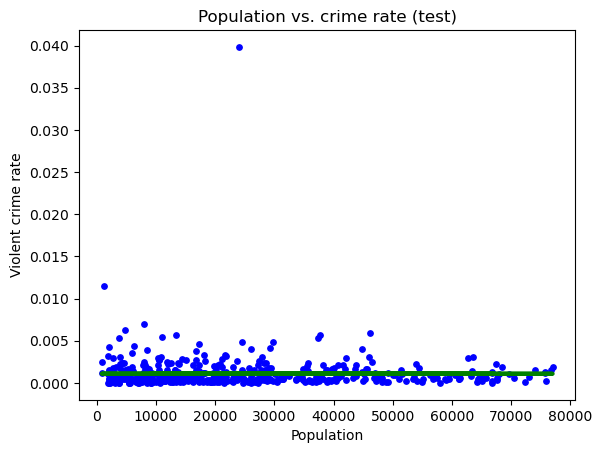

In [37]:
plot_test2 = plt
plot_test2.scatter(A_test, b_test, color='blue', s = 15)
plot_test2.plot(A_test, b_predict, color='green', linewidth =3)
plot_test2.title('Population vs. crime rate (test)')
plot_test2.xlabel('Population')
plot_test2.ylabel('Violent crime rate')
plot_test2.show()

the line looks like it got even straighter, let's see what happens with the summary statistics

In [38]:
stats = mean_squared_error(b_test, b_predict)
r2_1 = r2_score(b_test, b_predict)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', stats)
print('R2 score: ', r2_1)

Slope: [[-1.75580248e-10]]
Mean squared error:  4.66263106359845e-06
R2 score:  -0.001560984677375421


so not a ton of change; let's try it with violent crimes without the outliers

In [66]:
sns.distplot(df['Violent crime rate'], bins=25)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Violent crime rate', ylabel='Density'>

In [67]:
df['Violent crime rate'].max()

0.03984345726300013

In [68]:
df['Violent crime rate'].mean()

0.0010742915808400933

In [69]:
df_safe = df[(df['Violent crime rate'] < .01) & (df['Population'] < 77220)]

In [70]:
H = df_safe['Population'].values.reshape(-1,1)
m = df_safe['Violent crime rate'].values.reshape(-1,1)

In [71]:
H_train, H_test, m_train, m_test = train_test_split(H, m, test_size=0.3, random_state=0)

In [72]:
regression3 = LinearRegression()

In [73]:
regression3.fit(H_train, m_train)

LinearRegression()

In [74]:
m_predict = regression.predict(H_test)

In [76]:
plot_test3 = plt
plot_test3.scatter(H_test, m_test, color='blue', s = 15)
plot_test3.plot(H_test, m_predict, color='yellow', linewidth =3)
plot_test3.title('Population vs. crime rate (test)')
plot_test3.xlabel('Population')
plot_test3.ylabel('Violent crime rate')
plot_test3.show()

In [77]:
stat = mean_squared_error(m_test, m_predict)
r2_2 = r2_score(m_test, m_predict)

In [78]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', stat)
print('R2 score: ', r2_2)

Slope: [[-1.75580248e-10]]
Mean squared error:  1.2616453662044654e-06
R2 score:  -0.0005224517204949208


dang so based on our summary stats even worse. really small r squared value!

In [80]:
#anyway that would obviously only lead to a model that would work in smaller counties, which is the bulk of the US. 
#in any case we are gonna need a more complex model
#let's go back and compare actual/predicted from our original dataframe
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
data.head(15)

Actual  Predicted
0   0.000119   0.001089
1   0.002398   0.001063
2   0.000481   0.001093
3   0.001874   0.001093
4   0.001550   0.001095
5   0.001586   0.001092
6   0.000811   0.001096
7   0.000180   0.001095
8   0.002041   0.001092
9   0.002984   0.001088
10  0.001922   0.001089
11  0.000698   0.001097
12  0.004707   0.001097
13  0.003392   0.001027
14  0.001200   0.001094

so we don't have a great model over here. This situation is going to be more complicated than a linear algorithm. We've had bias the whole time because our data on crime is based on what a county does or doesn't report, which is a human decision, and it might be the case that a city (higher population) would underreport its crime because cities are more well-known, discussed in the media, etc. and the city government wants to maintain a certain reputation. In this case, we may also want to look at a different variable, population density. Violent crime might occur more if people are more closely crowded together, whereas if your nearest neighbor is 12 miles away you're less likely to have a violent altercation. Maybe something worth checking out in the future. 

In [82]:
df.to_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'laws_crime_ratio.csv'))